# CS 452/552 Data Science with Python: Homework 2

Download data files from LMS. Code/Explain your solution over this `IPython` notebook at required cells, and complete locally.

To submit your assignment, in LMS, upload your solution to LMS as a single notebook with following file name format:

`lastName_firstName_CourseNumber_HW2.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 452 or CS 552).

Problems on homework assignments are equally weighted.

Any type of plagiarism will not be tolerated. Your submitted codes will be compared with other submissions and also the codes available on internet and violations will have a penalty of -100 points. (In case of copying from
another student both parties will get -100)

Import libraries

In [1]:
#Import libraries before starting
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import statsmodels.api as sm

**All datasets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Polynomial Regression
In this problem, we revisit a dataset from Homework 1 and fit polynomial regression models to it. The dataset is provided in the file ``dataset_3.txt``, which contains a single predictor variable ``x`` in the first column and the response variable ``y`` in the second column. 

### Part(a): Implement polynomial regression from scratch

- Implement the following three functions from scratch:

    - ``polynomial_regression_fit``:
        - takes as input: training set, ``x_train``, ``y_train`` and the degree of the polynomial
        - fits a polynomial regression model 
        - returns the model parameters (array of coefficients and the intercept)

    - ``polynomial_regression_predict``: 
        - takes as input: the model parameters (array of coefficients and the intercept), the degree of the polynomial and the test set predictors ``x_test``
        - returns the response values predicted by the model on the test set. 

    - ``polynomial_regression_score``: 
        - takes an array of predicted response values and the array of true response values ``y_test``
        - returns R^2 score for the model on the test set, as well as the sum of squared errors

- Fit polynomial regression models of degrees 3, 5, 10 and 25 to the data set. Visualize the original data along with the fitted models for the various degrees in the same plot. 

For this problem, you may use the other in-built functions in ``sklearn``, while implementing the solution.

### Polynomial Regression $$y_i =β0 +β_1x_i +β_2x^2_i +β_3x^3_i +...+β_d x^d_i +ε_i$$

**Solution:**

In [2]:
data = np.loadtxt('datasets/dataset_3.txt', delimiter=',', skiprows=1)
x = data[:, 0]
y = data[:, 1]

In [3]:
x.shape

(100,)

In [4]:
y.shape

(100,)

In [5]:
x[5:]

array([0.9827  , 0.80825 , 0.63028 , 0.72363 , 0.24265 , 0.69451 ,
       0.60749 , 0.012743, 0.97652 , 0.91329 , 0.47996 , 0.60952 ,
       0.30162 , 0.76252 , 0.33226 , 0.24326 , 0.38261 , 0.058972,
       0.59201 , 0.27079 , 0.1428  , 0.65013 , 0.91942 , 0.92423 ,
       0.32607 , 0.93116 , 0.42039 , 0.58898 , 0.2193  , 0.98219 ,
       0.98018 , 0.24261 , 0.76157 , 0.040263, 0.57685 , 0.70083 ,
       0.53018 , 0.48976 , 0.23944 , 0.38015 , 0.21487 , 0.57338 ,
       0.97694 , 0.13795 , 0.1087  , 0.5995  , 0.46635 , 0.90728 ,
       0.68849 , 0.016186, 0.18416 , 0.79801 , 0.89082 , 0.28556 ,
       0.79875 , 0.87619 , 0.18921 , 0.40037 , 0.69888 , 0.65082 ,
       0.13412 , 0.715   , 0.90133 , 0.64675 , 0.14731 , 0.32063 ,
       0.48321 , 0.78872 , 0.95933 , 0.4773  , 0.50647 , 0.5812  ,
       0.75707 , 0.78268 , 0.22379 , 0.1575  , 0.58625 , 0.51904 ,
       0.8477  , 0.55796 , 0.25648 , 0.52378 , 0.25461 , 0.14056 ,
       0.029917, 0.69138 , 0.57254 , 0.52958 , 0.19446 , 0.453

In [6]:
y[5:]

array([ 0.27228 ,  0.27585 ,  0.31856 ,  0.074964,  0.98807 ,  0.19398 ,
        0.59353 ,  0.69141 ,  0.23641 ,  0.10798 ,  0.77356 ,  0.31562 ,
        0.92028 ,  0.091609,  0.74293 ,  1.0872  ,  0.75929 ,  0.94799 ,
        0.39336 ,  0.81714 ,  1.0873  ,  0.25514 ,  0.2101  ,  0.22167 ,
        0.85856 ,  0.31258 ,  0.66792 ,  0.35595 ,  1.1652  ,  0.36954 ,
        0.25187 ,  1.0232  ,  0.28938 ,  0.93099 ,  0.28319 ,  0.269   ,
        0.4121  ,  0.64098 ,  1.02    ,  0.82334 ,  1.0851  ,  0.42143 ,
        0.48927 ,  0.84285 ,  1.0019  ,  0.28685 ,  0.50976 ,  0.089873,
        0.1395  ,  0.80712 ,  1.1308  , -0.008473,  0.13205 ,  0.94911 ,
        0.17337 ,  0.30402 ,  0.95759 ,  0.79861 ,  0.29482 ,  0.11862 ,
        1.2569  ,  0.20274 ,  0.21189 ,  0.24033 ,  1.0997  ,  0.97855 ,
        0.58507 ,  0.12372 ,  0.46815 ,  0.76368 ,  0.69627 ,  0.37174 ,
        0.030316,  0.21527 ,  1.0543  ,  1.0454  ,  0.4279  ,  0.6184  ,
        0.079209,  0.45458 ,  0.93484 ,  0.63821 , 

In [7]:
def polynomial_regression_fit(X_train, y_train, degree):
    X = np.ones((len(X_train), degree+1)) # intercept has 1 x n 
    for i in range(1, degree+1):
        X[:, i] = X_train ** i 

    #print(f"X shape: {X.shape}") # (100, 4)
    #print(f"y shape: {y_train.shape}") # (100,)
    #print(f"Design matrix: {X}")
    
    # normal equation: (X^T X)^-1 X^T y
    XTX = X.T @ X
    coeffs = np.linalg.inv(XTX) @ X.T @ y_train
    intercept = coeffs[0]
    #print(f"Intercept: {intercept}")
    weights = coeffs[1:]
    #print(f"Weights: {weights}")
    return intercept, weights

In [8]:
def polynomial_regression_predict(intercept, weights, degree, x_test):
    X_test = np.ones((len(x_test), degree + 1))
    for i in range(1, degree+1):
        X_test[:, i] = x_test ** i
    #print(f"X_test shape: {X_test.shape}")
    #print(f"y_test shape: {x_test.shape}")
    #print(f"Design matrix for test phase: {X_test}")
    coefficients = np.concatenate([[intercept], weights])
    y_pred = X_test @ coefficients
    #print(f"Predictions shape: {y_pred.shape}") # Predictions shape: (500,)
    return y_pred

In [9]:
def polynomial_regression_score(y_true, y_pred):
    rss = np.sum((y_true - y_pred) ** 2)
    #print(f"Sum of squared errors: {rss}")
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - rss / tss
    #print(f"R^2: {r2}")
    return r2, rss

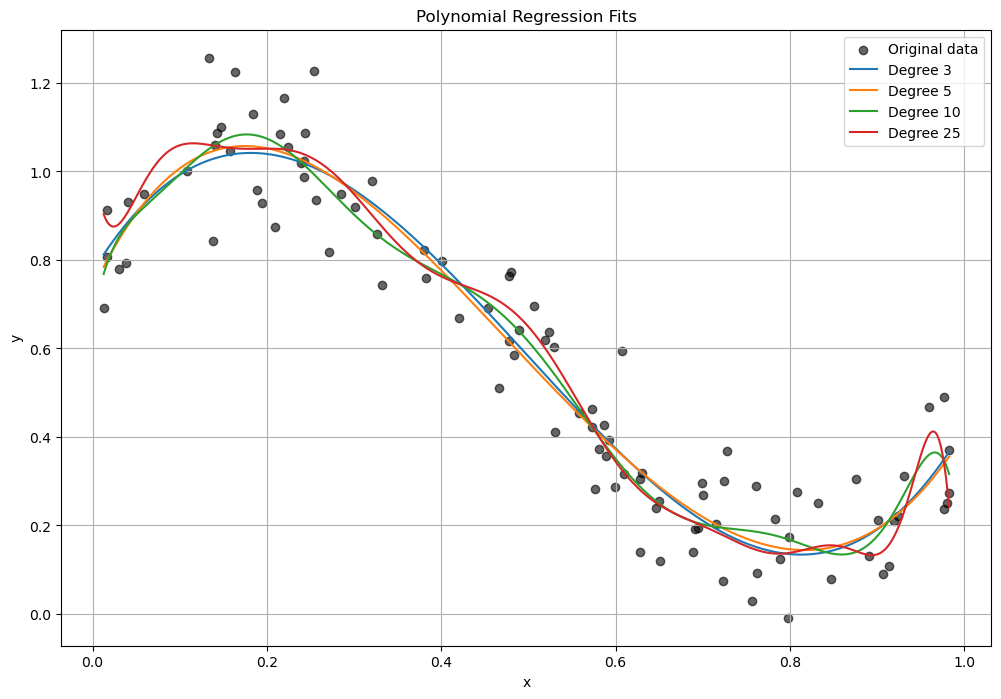

In [10]:
degrees = [3, 5, 10, 25]
x_plot = np.linspace(min(x), max(x), 500)

plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='black', label='Original data', alpha=0.6)

for degree in degrees:
    intercept, weights = polynomial_regression_fit(x, y, degree)
    y_pred_plot = polynomial_regression_predict(intercept, weights, degree, x_plot)
    plt.plot(x_plot, y_pred_plot, label=f'Degree {degree}')
    
plt.title('Polynomial Regression Fits')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
for degree in degrees:
    intercept, weights = polynomial_regression_fit(x, y, degree)
    y_pred_train = polynomial_regression_predict(intercept, weights, degree, x)
    r2, sse = polynomial_regression_score(y, y_pred_train)
    print(f'Degree {degree} polynomial: R^2 = {r2:.4f}, Sum of Squared Error = {sse:.4f}')

Degree 3 polynomial: R^2 = 0.9213, Sum of Squared Error = 0.9633
Degree 5 polynomial: R^2 = 0.9222, Sum of Squared Error = 0.9515
Degree 10 polynomial: R^2 = 0.9282, Sum of Squared Error = 0.8782
Degree 25 polynomial: R^2 = 0.9250, Sum of Squared Error = 0.9181


###  Part (b): Comparing training and test errors

- Split the data set in Problem 1 each into training and test sets: use the first 50% of the data for training and the remaining for testing. 


- Fit polynomial models of varying degree ranging from 1 to 15 to the training sets. Evaluate  the various fits on **both** the training and the test sets. Plot both the R^2 score of the fitted polynomial models on the training and test sets as a functions of the degree. 


- Describe the relationship between degree of the polynomial model and the fit on both the training and testing data. Explain, based on the plot, what is the best polynomial model for the data.

**Solution:**

In [12]:
data = np.loadtxt('datasets/dataset_3.txt', delimiter=',', skiprows=1)
x = data[:, 0]
y = data[:, 1]

In [13]:
x.shape, y.shape

((100,), (100,))

In [14]:
split_index = int(len(x) * 0.5)
x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [15]:
x_train.shape, x_test.shape

((50,), (50,))

In [16]:
y_train.shape, y_test.shape

((50,), (50,))

In [17]:
x_train[0], y_train[0]

(np.float64(0.016353), np.float64(0.91325))

In [18]:
x_test[0], y_test[0]

(np.float64(0.5995), np.float64(0.28685))

In [19]:
degrees = range(1, 16)
train_r2_scores = []
test_r2_scores = []

In [20]:
for degree in degrees:
    intercept, weights = polynomial_regression_fit(x_train, y_train, degree)
    y_train_pred = polynomial_regression_predict(intercept, weights, degree, x_train)
    y_test_pred = polynomial_regression_predict(intercept, weights, degree, x_test)

    train_r2, sum_squared_error_train = polynomial_regression_score(y_train, y_train_pred)
    test_r2, sum_squared_error_test = polynomial_regression_score(y_test, y_test_pred)

    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

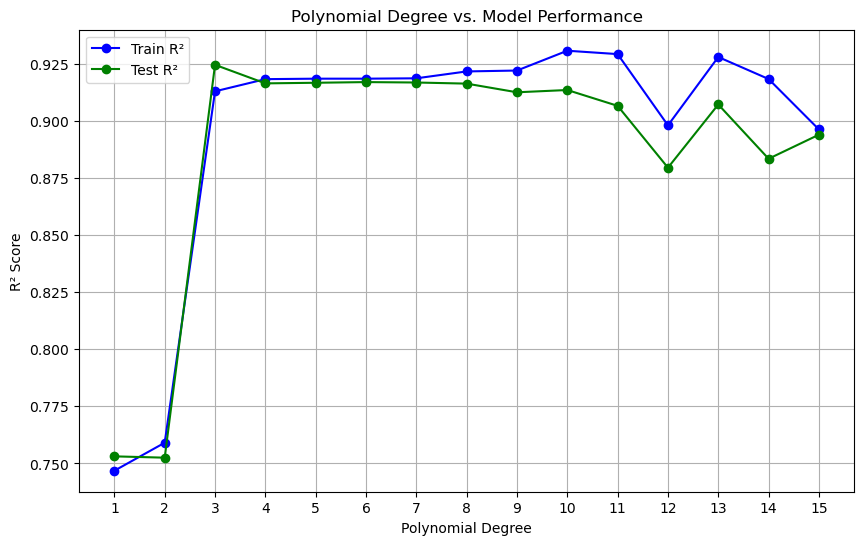

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2_scores, marker='o', label='Train R²', color='blue')
plt.plot(degrees, test_r2_scores, marker='o', label='Test R²', color='green')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Polynomial Degree vs. Model Performance')
plt.legend()
plt.grid(True)
plt.xticks(degrees) # x-axis are the degree of the polynomial
plt.show()

For low degree polynomials whih are 1 and 2, both training and test R^2 values are low like ~0.75. The models are underfitting, probably too simple for capture the patterns in the dataset. Then in degree 3, there is a drastic jump in both train and test scores to ~0.92. This jump suggests that patterns can be represented better with 3 degree polynomial. For degrees between 3 and 8, training and test R^2 scores remain very close to each other. So, middle degree polynomials demonstrate generalizatability behavior. For higher degree polynomails which are between 9 and 15, training R^2 score contiunes to improve and peak around degreea 9-10 but test R^2 begins to  diminish and become volatile after degree 10 so this behavior indicates overfitting.

For test R^2, in degrees 12 and 14 there is a significant drop. This demonstrate higher degree polynomials sensitiveness to the specific training data

## Problem 2: Variable selection and regularization

The data set for this problem is provided in ``dataset_1.txt`` and contains 10 predictors and a response variable.

### Part (a): Analyze correlation among predictors
- By visually inspecting the data set, do find that some of the predictors are correlated amongst themselves?


- Compute the cofficient of correlation between each pair of predictors, and visualize the matrix of correlation coefficients using a heat map. Do the predictors fall naturally into groups based on the correlation values?


- If you were asked to select a minimal subset of predictors based on the correlation information in order to build a good regression model, how many predictors will you pick, and which ones will you choose? 

**Solution:**

In [22]:
data = pd.read_csv('datasets/dataset_1.txt', delimiter=',')

In [23]:
data.shape

(100, 11)

In [24]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.959357,0.959357,0.959357,0.343727,0.524083,0.537768,0.435598,0.831999,0.153247,0.005016,0.289394
1,0.616969,0.616969,0.616969,0.287376,0.513844,0.497775,0.452732,0.914609,0.367390,0.444473,-0.277574
2,0.995941,0.995941,0.995941,0.107294,0.097106,0.146751,0.136414,0.635926,0.535209,0.899457,-0.513097
3,0.821732,0.821732,0.821732,0.202558,0.329504,0.359471,0.281453,0.106263,0.479327,0.256271,-0.182353
4,0.302423,0.302423,0.302423,0.184564,0.270263,0.293385,0.263866,0.378630,0.740241,0.468589,-0.625117


<Figure size 1500x1200 with 0 Axes>

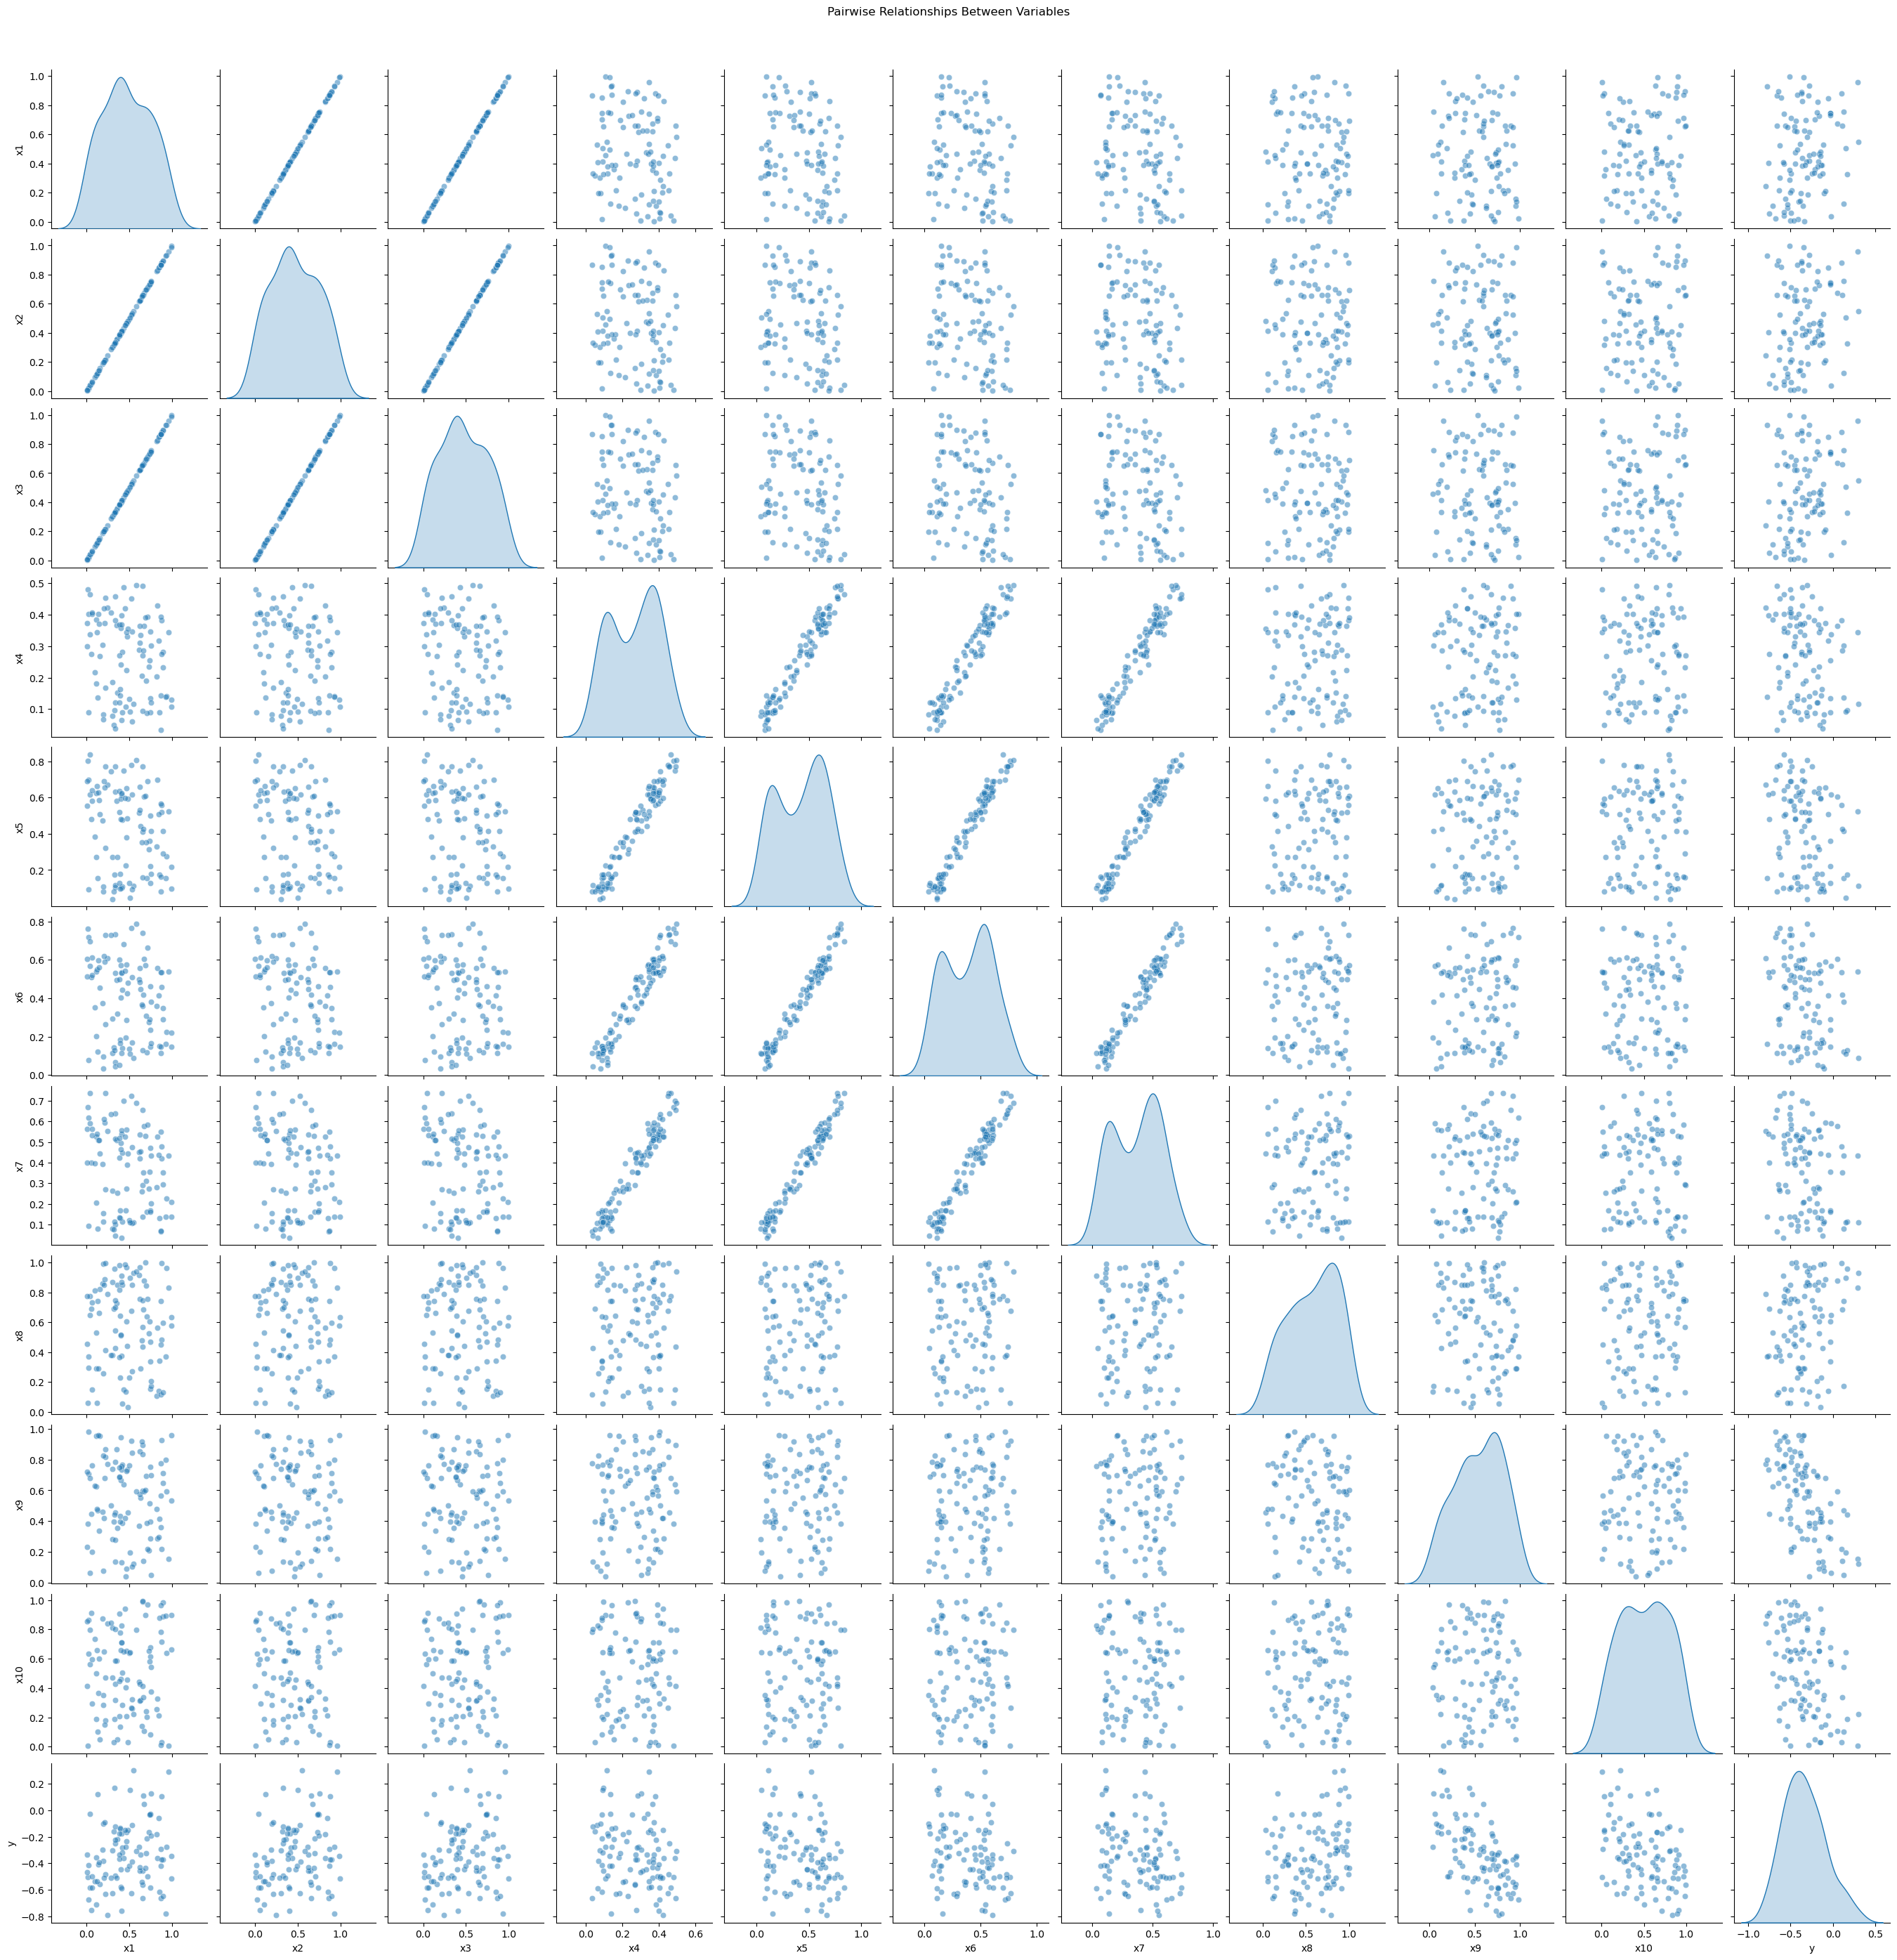

In [25]:
plt.figure(figsize=(15, 12))
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Relationships Between Variables', y=1.02)
plt.show()

In [26]:
response_variable = data.columns[-1] # last column is the response variable
predictors = data.drop(columns=[response_variable])

In [27]:
predictors.head

<bound method NDFrame.head of           x1        x2        x3        x4        x5        x6        x7  \
0   0.959357  0.959357  0.959357  0.343727  0.524083  0.537768  0.435598   
1   0.616969  0.616969  0.616969  0.287376  0.513844  0.497775  0.452732   
2   0.995941  0.995941  0.995941  0.107294  0.097106  0.146751  0.136414   
3   0.821732  0.821732  0.821732  0.202558  0.329504  0.359471  0.281453   
4   0.302423  0.302423  0.302423  0.184564  0.270263  0.293385  0.263866   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.142765  0.142765  0.142765  0.370190  0.585857  0.559931  0.509616   
96  0.466801  0.466801  0.466801  0.224372  0.380552  0.287452  0.273343   
97  0.061236  0.061236  0.061236  0.407047  0.581155  0.518967  0.563076   
98  0.452240  0.452240  0.452240  0.420570  0.598895  0.542769  0.526554   
99  0.199887  0.199887  0.199887  0.418667  0.691874  0.619588  0.609898   

          x8        x9       x10  
0   0.831999  0.153247

In [28]:
corr_matrix = predictors.corr()

In [29]:
print("Correlation matrix:\n", corr_matrix)

Correlation matrix:
            x1        x2        x3        x4        x5        x6        x7  \
x1   1.000000  1.000000  1.000000 -0.189945 -0.232439 -0.215623 -0.228322   
x2   1.000000  1.000000  1.000000 -0.189945 -0.232439 -0.215623 -0.228322   
x3   1.000000  1.000000  1.000000 -0.189945 -0.232439 -0.215623 -0.228322   
x4  -0.189945 -0.189945 -0.189945  1.000000  0.974279  0.964344  0.969540   
x5  -0.232439 -0.232439 -0.232439  0.974279  1.000000  0.982785  0.982227   
x6  -0.215623 -0.215623 -0.215623  0.964344  0.982785  1.000000  0.976308   
x7  -0.228322 -0.228322 -0.228322  0.969540  0.982227  0.976308  1.000000   
x8  -0.047643 -0.047643 -0.047643  0.058516  0.080342  0.079547  0.074004   
x9  -0.061022 -0.061022 -0.061022  0.108294  0.126004  0.123368  0.112241   
x10  0.050977  0.050977  0.050977 -0.010416 -0.012399 -0.021029 -0.022023   

           x8        x9       x10  
x1  -0.047643 -0.061022  0.050977  
x2  -0.047643 -0.061022  0.050977  
x3  -0.047643 -0.061022

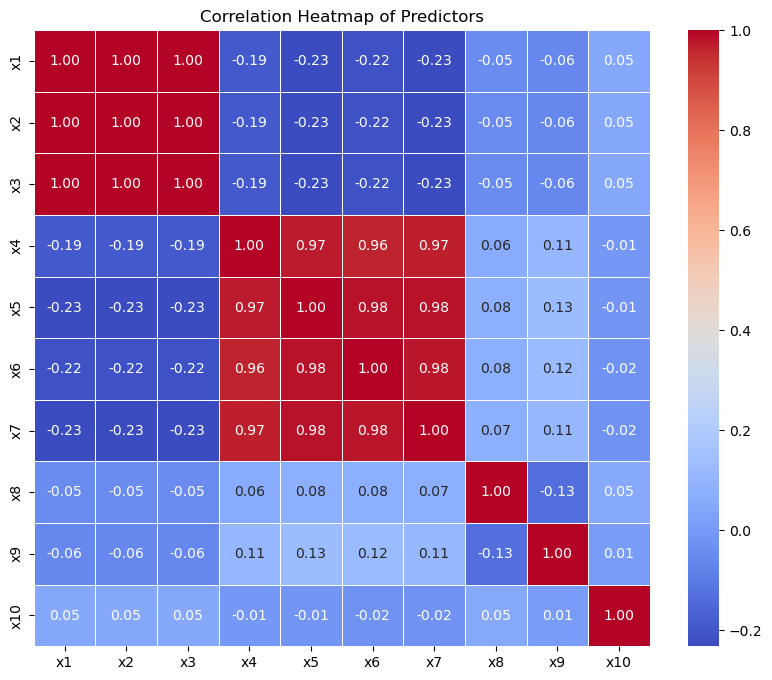

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Predictors')
plt.show()

Variables x1, x2 and x3 show perfect correlation (coefficient 1.0) with each other. This means, they contain similar information. Selecting all of them for regression model is redundant.

Variables x4,x5,x6, and x7 is another group for high correlation with correlations ranging from 0.96 to 0.98. Again, those variables capture similar information.

Variables x8, x9, and x10 are independent, showing very small correlation with other predictors and with each other. Even x8 and x9 have a negative correlation between them. Also x10 shows negligible correlation with other predictors because of the near zero correlation coefficients.

Group x1,x2,x3 and Group x4,x5,x6,x7 are negatively correlated, this indicates that they may represent opposite trends in the dataset.
Both groups have smaller correlation with independent variables which are x8, x9, and x10.

Group 1 : x1, x2, x3 --> perfectly correlated
Group 2: x4, x5, x6, x7 --> highly correlated
Group 3: x8, x9, x10 --> independent variables

If all variables were included in a regression model, this grouping structure indicates high multicollinearity within Groups A and B, which could result in unstable coefficient estimates and interpretive challenges.

In order to prevent redundancy and possible numerical unsteadiness, the existence of these obvious correlation patterns strongly implies that variable selection or dimensionality reduction would be beneficial to developing a regression model.

<Figure size 1400x1200 with 0 Axes>

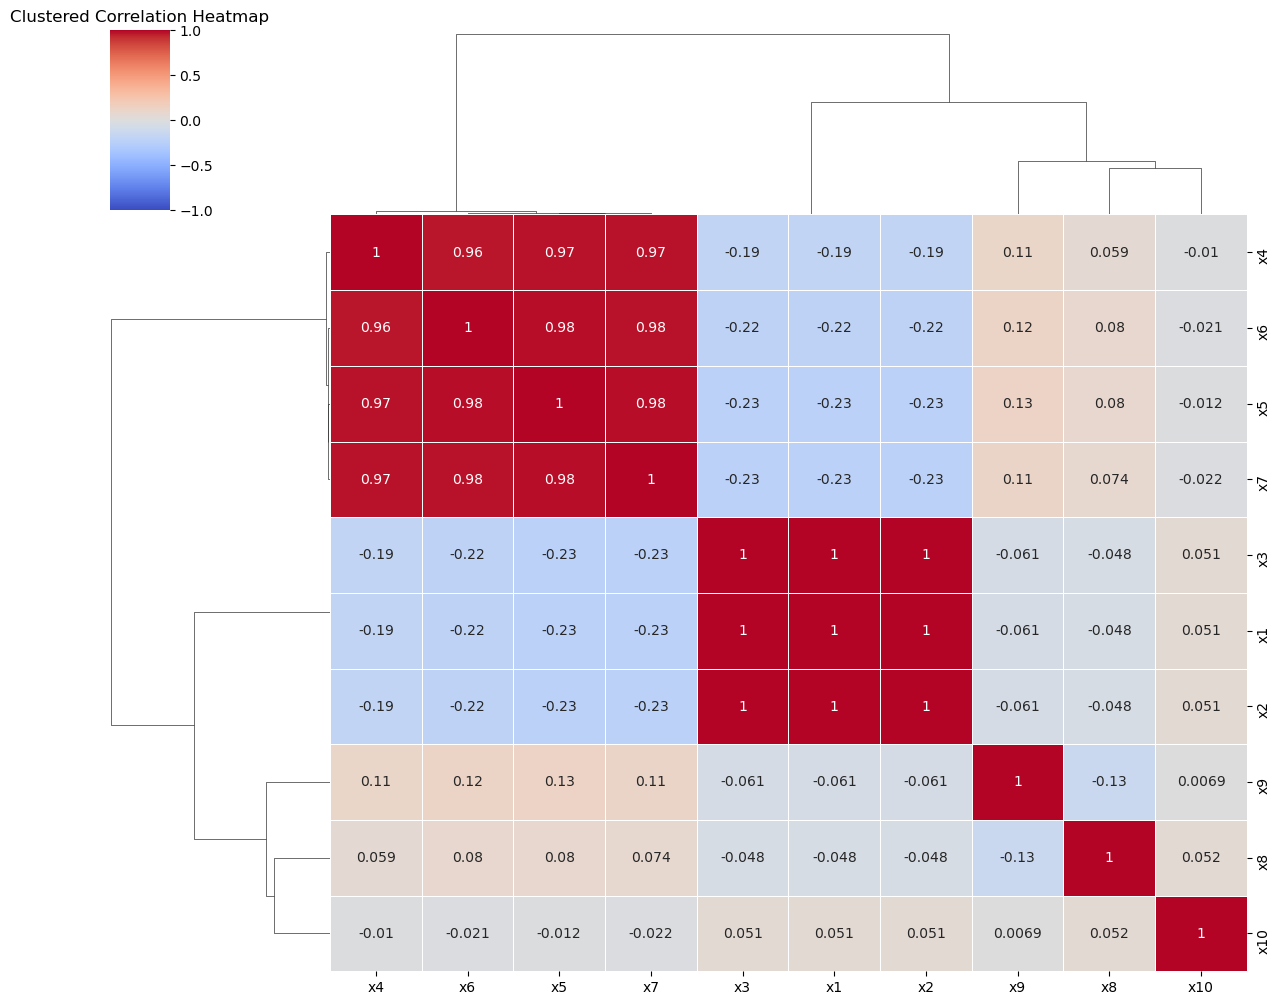

In [31]:
plt.figure(figsize=(14, 12))
cluster_grid = sns.clustermap(corr_matrix, method='ward', cmap='coolwarm',
               annot=True, vmin=-1, vmax=1, center=0, 
               figsize=(12, 10), linewidths=.5)
plt.title('Clustered Correlation Heatmap')
plt.show()

**Explanation:**

From the perfectly correlated group (x1, x2, x3), select only one variable for example x1. From the highly correlated group (x4, x5, x6, x7) again select only one variable for example x6 then lastly from the independent variables group, select all three variables because these variables show minimum correlation with each other and with other predictors. 
In total --> 5 predictors selected for the regression model

### Part (b): Selecting minimal subset of predictors

- Apply the variable selection methods discussed in class to choose a minimal subset of predictors that yield high prediction accuracy:
    
    - Exhaustive search
    
    - Step-wise forward selection

&emsp;&nbsp;&nbsp; In each method, use the Bayesian Information Criterion (BIC) to choose the subset size.

- Do the chosen subsets match the ones you picked using the correlation matrix you had visualized in Part (a)?

**Note**: You may use `sklearn` or `statsmodels`'s `OLS` module to fit a linear regression model and evaluate BIC. You may **not** use library functions that implement variable selection.

**Solution:**

In [32]:
data = pd.read_csv('datasets/dataset_1.txt', delimiter=',')
X = data.drop(columns=['y'])
y = data['y']

In [33]:
x.shape, y.shape

((100,), (100,))

In [ ]:
def compute_bic(X_subset, y):
    X_with_const = sm.add_constant(X_subset) # add intercept
    model = sm.OLS(y, X_with_const).fit() # fit model
    return model.bic

In [59]:
def exhaustive_search(X, y):
    predictors = X.columns # all X's are predictors where y is the target
    best_bic = np.inf
    best_subset = None
    visited_subsets = []

    for k in range(1, len(predictors) + 1): # iterate over all predictors
        for subset in itertools.combinations(predictors, k): # control all subsets of predictors
            X_subset = X[list(subset)]
            bic = compute_bic(X_subset, y)
            visited_subsets.append((subset, bic))
            print(f"Subset: {subset}, BIC: {bic}")
            if bic < best_bic: # if new bic is smaller than best bic, new subset is the best set
                best_bic = bic
                best_subset = subset

    return best_subset, best_bic, visited_subsets

In [60]:
def forward_selection(X, y):
    remaining_predictors = list(X.columns)
    selected_predictors = [] # start with empty model (no predictors)
    current_bic = np.inf # so bic is infinate for empty model
    visited_subsets = []

    while remaining_predictors: # while there are predictors remain for testing, continue
        bic_with_candidates = []

        for candidate in remaining_predictors: # for each remaining predictor, test with bic
            predictors_to_test = selected_predictors + [candidate]
            X_subset = X[predictors_to_test]
            bic = compute_bic(X_subset, y)
            print(f"Testing predictor: {candidate}, BIC: {bic}")
            bic_with_candidates.append((bic, candidate))

        bic_with_candidates.sort() # sort BIC values of candidates 
        best_new_bic, best_candidate = bic_with_candidates[0] # best candidate is the lowest BIC value
        print(f"Best candidate: {best_candidate}")

        visited_subsets.append((tuple(selected_predictors + [best_candidate]), best_new_bic))

        if best_new_bic < current_bic:
            current_bic = best_new_bic
            selected_predictors.append(best_candidate)
            remaining_predictors.remove(best_candidate)
        else:
            break

    return selected_predictors, current_bic, visited_subsets

In [61]:
best_exhaustive_subset, best_exhaustive_bic, exhaustive_subsets = exhaustive_search(X, y)
print(f"Exhaustive Search - Best subset: {best_exhaustive_subset}, BIC: {best_exhaustive_bic}")

Subset: ('x1',), BIC: 5.484319923913301
Subset: ('x2',), BIC: 5.484319923913301
Subset: ('x3',), BIC: 5.484319923913301
Subset: ('x4',), BIC: 4.164302404362683
Subset: ('x5',), BIC: 2.5431672275614225
Subset: ('x6',), BIC: 2.3320941423445554
Subset: ('x7',), BIC: 3.67336058522336
Subset: ('x8',), BIC: 3.541804178246206
Subset: ('x9',), BIC: -36.72014375580788
Subset: ('x10',), BIC: -8.635065661702289
Subset: ('x1', 'x2'), BIC: 5.484319923913301
Subset: ('x1', 'x3'), BIC: 5.484319923913301
Subset: ('x1', 'x4'), BIC: 6.174966493386281
Subset: ('x1', 'x5'), BIC: 5.028158608969507
Subset: ('x1', 'x6'), BIC: 4.718179445756933
Subset: ('x1', 'x7'), BIC: 5.996960760227781
Subset: ('x1', 'x8'), BIC: 3.471176681284449
Subset: ('x1', 'x9'), BIC: -36.21588922295453
Subset: ('x1', 'x10'), BIC: -9.832139575998808
Subset: ('x2', 'x3'), BIC: 5.484319923913301
Subset: ('x2', 'x4'), BIC: 6.174966493386281
Subset: ('x2', 'x5'), BIC: 5.028158608969507
Subset: ('x2', 'x6'), BIC: 4.718179445756933
Subset: 

In [62]:
best_forward_subset, best_forward_bic, forward_subsets = forward_selection(X, y)
print(f"Forward Selection - Best subset: {best_forward_subset}, BIC: {best_forward_bic}")

Testing predictor: x1, BIC: 5.484319923913301
Testing predictor: x2, BIC: 5.484319923913301
Testing predictor: x3, BIC: 5.484319923913301
Testing predictor: x4, BIC: 4.164302404362683
Testing predictor: x5, BIC: 2.5431672275614225
Testing predictor: x6, BIC: 2.3320941423445554
Testing predictor: x7, BIC: 3.67336058522336
Testing predictor: x8, BIC: 3.541804178246206
Testing predictor: x9, BIC: -36.72014375580788
Testing predictor: x10, BIC: -8.635065661702289
Best candidate: x9
Testing predictor: x1, BIC: -36.21588922295453
Testing predictor: x2, BIC: -36.21588922295453
Testing predictor: x3, BIC: -36.21588922295453
Testing predictor: x4, BIC: -36.311675177993635
Testing predictor: x5, BIC: -37.52934795466072
Testing predictor: x6, BIC: -37.86308155257578
Testing predictor: x7, BIC: -36.73714989581603
Testing predictor: x8, BIC: -36.207080125177725
Testing predictor: x10, BIC: -61.73237977288093
Best candidate: x10
Testing predictor: x1, BIC: -64.2964704076461
Testing predictor: x2, BI

In [63]:
import networkx as nx

def plot_search_tree(visited_subsets, search_type='Exhaustive'):
    G = nx.DiGraph()

    for i, (subset, bic) in enumerate(visited_subsets):
        G.add_node(i, label=f"{subset}\nBIC: {bic:.2f}")

        if i > 0:
            # Connect current node to previous one
            prev_subset = visited_subsets[i-1][0]
            G.add_edge(i-1, i)

    pos = nx.spring_layout(G, seed=42) 
    labels = nx.get_node_attributes(G, 'label')
    
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', arrows=True, font_size=8)
    nx.draw_networkx_labels(G, pos, labels)
    plt.title(f"{search_type} Search Process with BIC Values")
    plt.show()

In [65]:
import pandas as pd

def plot_search_tree_with_table(visited_subsets, search_type='Exhaustive'):
    plot_search_tree(visited_subsets, search_type)

    table_data = [(str(subset), bic) for subset, bic in visited_subsets]
    df = pd.DataFrame(table_data, columns=["Subset", "BIC"])
    
    print("BIC Values for Subsets:")
    print(df)

    plt.figure(figsize=(10, 6))
    df.plot(kind='bar', x='Subset', y='BIC', legend=False)
    plt.title(f"{search_type} BIC Values for Subsets")
    plt.ylabel('BIC')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


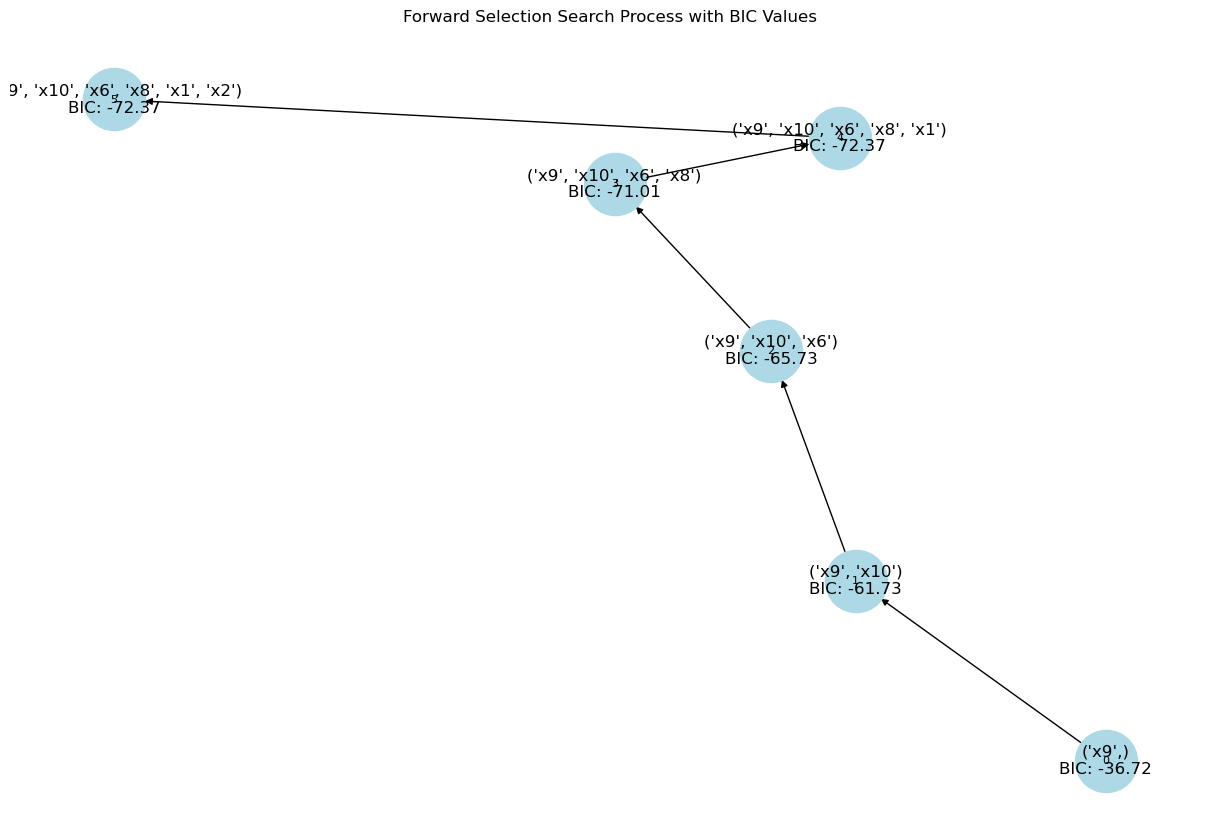

BIC Values for Subsets:
                                  Subset        BIC
0                                ('x9',) -36.720144
1                          ('x9', 'x10') -61.732380
2                    ('x9', 'x10', 'x6') -65.728760
3              ('x9', 'x10', 'x6', 'x8') -71.007523
4        ('x9', 'x10', 'x6', 'x8', 'x1') -72.366019
5  ('x9', 'x10', 'x6', 'x8', 'x1', 'x2') -72.366019


<Figure size 1000x600 with 0 Axes>

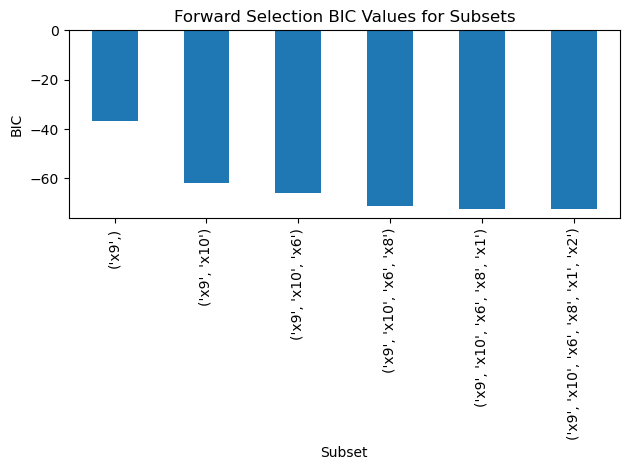

In [68]:
plot_search_tree_with_table(forward_subsets, search_type='Forward Selection')

**Explanation:**

Both algorithms selected x1 from the perfect correlated group (x1, x2, x3)
Both models selected x6 from the highly correlated group (x4, x5, x6, x7)
Both models included all three independent variables (x8, x9, x10)
Both algorithms selected 5 predictors, which aligns with what I selected based on the correlation matrix. Number of parameters and the selected parameters represents the optimal balance between model complexity and the pattern matching power for the dataset.

Selection of methods and the selected subset from correlation matrix are same. Correlation analysis and BIC lead to same conclusions

The approach avoids multicollinearity problem that would occur from including multiple highly correlated predictors by choosing only one variable from each associated group.

### Part (c): Apply Lasso and Ridge regression

- Apply Lasso regression with regularization parameter $\lambda = 0.01$ and fit a regression model.

    - Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?


- Apply Ridge regression with regularization parameter $\lambda = 0.01$ and fit a regression model.

    - Is there a difference between the model parameters you obtain different and those obtained from Lasso regression? If so, explain why.

    - Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?


- Is there anything peculiar that you observe about the coefficients Ridge regression assigns to the first three predictors? Do you observe the same with Lasso regression? Give an explanation for your observation.

**Note**: You may use the `statsmodels` or `sklearn` to perform Lasso and Ridge regression.

**Solution:**

In [72]:
data = pd.read_csv('datasets/dataset_1.txt', delimiter=',')

In [73]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.959357,0.959357,0.959357,0.343727,0.524083,0.537768,0.435598,0.831999,0.153247,0.005016,0.289394
1,0.616969,0.616969,0.616969,0.287376,0.513844,0.497775,0.452732,0.914609,0.367390,0.444473,-0.277574
2,0.995941,0.995941,0.995941,0.107294,0.097106,0.146751,0.136414,0.635926,0.535209,0.899457,-0.513097
3,0.821732,0.821732,0.821732,0.202558,0.329504,0.359471,0.281453,0.106263,0.479327,0.256271,-0.182353
4,0.302423,0.302423,0.302423,0.184564,0.270263,0.293385,0.263866,0.378630,0.740241,0.468589,-0.625117


In [74]:
X = data.iloc[:, :-1] 
y = data.iloc[:, -1]

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (80, 10)
Test set size: (20, 10)


In [76]:
from sklearn.linear_model import Lasso

lambda_lasso = 0.01
lasso = Lasso(alpha=lambda_lasso)
lasso.fit(X_train, y_train)
lasso_coefficients = lasso.coef_

In [77]:
non_zero_lasso_predictors = np.where(lasso_coefficients != 0)[0]
print("Lasso Non-Zero Coefficients at λ=0.01:")
for idx in non_zero_lasso_predictors:
    print(f"Predictor {X_train.columns[idx]}: {lasso_coefficients[idx]}")

Lasso Non-Zero Coefficients at λ=0.01:
Predictor x1: 0.06457459086167035
Predictor x5: -0.043312721012035454
Predictor x8: 0.027163064807072753
Predictor x9: -0.36951582301408203
Predictor x10: -0.1843997014106152


In [78]:
from sklearn.linear_model import Ridge

lambda_ridge = 0.01

ridge = Ridge(alpha=lambda_ridge)
ridge.fit(X_train, y_train)

ridge_coefficients = ridge.coef_

In [79]:
print("Ridge Coefficients at λ=0.01:")
for idx, coef in enumerate(ridge_coefficients):
    print(f"Predictor {X_train.columns[idx]}: {coef}")

Ridge Coefficients at λ=0.01:
Predictor x1: 0.050784798487216294
Predictor x2: 0.050784798487213054
Predictor x3: 0.05078479848720696
Predictor x4: 0.411271499400361
Predictor x5: 0.005938952803013698
Predictor x6: -0.9181091826624997
Predictor x7: 0.47325886599387523
Predictor x8: 0.1828358661988361
Predictor x9: -0.48877551746325976
Predictor x10: -0.3323245207770538


In [81]:
lasso_non_zero = X_train.columns[non_zero_lasso_predictors]  # Lasso non-zero predictors
ridge_non_zero = X_train.columns[np.where(ridge_coefficients != 0)[0]]  # Ridge non-zero predictors

In [82]:
print("Lasso Non-Zero Predictors:")
print(lasso_non_zero)

Lasso Non-Zero Predictors:
Index(['x1', 'x5', 'x8', 'x9', 'x10'], dtype='object')


In [83]:
print("Ridge Non-Zero Predictors:")
print(ridge_non_zero)

Ridge Non-Zero Predictors:
Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10'], dtype='object')


In [84]:
print("Lasso Coefficients:", lasso_coefficients)
print("Ridge Coefficients:", ridge_coefficients)

Lasso Coefficients: [ 0.06457459  0.          0.         -0.         -0.04331272 -0.
 -0.          0.02716306 -0.36951582 -0.1843997 ]
Ridge Coefficients: [ 0.0507848   0.0507848   0.0507848   0.4112715   0.00593895 -0.91810918
  0.47325887  0.18283587 -0.48877552 -0.33232452]


**Explanation:**

Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?


Lasso regression selected 5 variables with non-zero coefficients which are x1, x5, x8, x9, x10. This selected variables are same with the correlation matrix. From the perfect correlated group, Lasso selected only x1. From the highly correlated group, Lasso selected only x5 and selected all the independent variables because each of which contain unique information.

Is there a difference between the model parameters you obtain different and those obtained from Lasso regression? If so, explain why.

Ridge regression assigned non-zero coefficients to all predictors. For group 1, coefficients are same. For group 3, coefficients varied with larger magnitudes. For independent predictors, again the coefficients varied. 

Identify the predictors that are assigned non-zero coefficients. Do these correspond to  the correlation matrix in Part (a)?

Ridge regression non-zero coefficients are not similar with correlation matrix results because Ridge Regression assign some correlation for all the predictors which is not similar with the results from correlation matrix

* Ridge kept all 10 variables with non-zero coefficients 
* Lasso performed feature selection with selecting 5 variables only

* Ridge coefficients are distributed proportionally but not exactly zero for any of the variables
* Lasso select variables from each corelated group (feature selection)

Those differences occur because of the mathematical differences between Ridge and Lasso where Ridge uses L2 regularization and Lasso uses L1 regularization which is proper for feature selection

Is there anything peculiar that you observe about the coefficients Ridge regression assigns to the first three predictors? Do you observe the same with Lasso regression? Give an explanation for your observation.

Ridge assigned same coefficients for x1, x2, and x3. This is not a coincidence, when predictors are perfectly correlated Ridge distributed the coefficients equally between them so Ridge recognized those variables have similar information so assigned them equal importance

In contrast, Lasso selected only x1 from group 1 and set x2 and x3 exactly to zero. For the perfectly correlated predictors, Lasso behaves the select randomly one of them and set the others to zero for feature selection
